In [1]:
import cv2 
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import math
import glob
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
import seaborn as sns
#from sklearn import svm

In [2]:
def liff(folder,m,n):
    images = []
    for i in range(len(folder)):
        img = cv2.imread(folder[i])
        img= cv2.resize(img,(m,n), interpolation = cv2.INTER_AREA)
        img1 = cv2.flip(img, 1)
        img2=cv2.flip(img,0)
        img3=cv2.flip(img,2)
        img=np.array(255*(img / 255) ** 2, dtype = 'uint8')
        img1=np.array(255*(img1 / 255) ** 2, dtype = 'uint8')
        img2=np.array(255*(img2 / 255) ** 2, dtype = 'uint8')
        img3=np.array(255*(img3 / 255) ** 2, dtype = 'uint8')
        images.append(img)
        images.append(img1)
        images.append(img2)
        images.append(img3)
    images=np.array(images)
    
    return images

In [3]:
folder_positive=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/*.jpeg')
folder_positive.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/*.jpg'))
folder_positive.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/*.png'))

In [4]:
folder_positive

['/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (61).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (43).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (81).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (66).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (49).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (53).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (63).jpeg',
 '/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/House/house (71).jpeg',
 '/home/srikanth/Downloads/drive

In [5]:
positive_img=liff(folder_positive,96,96)

In [6]:
folder_negative=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Training/Not_House/*.jpg')

In [7]:
negative_img=liff(folder_negative,96,96)

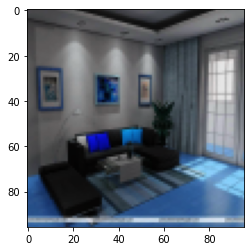

In [8]:
plt.imshow(positive_img[800])

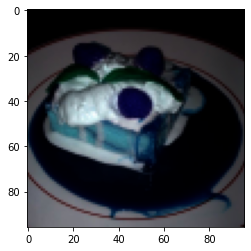

In [9]:
plt.imshow(negative_img[800])

In [10]:
pos_tar=[1]*(len(positive_img))

In [11]:
neg_tar=[0]*(len(negative_img))

In [12]:
img=np.concatenate([positive_img,negative_img])

In [13]:
target=np.concatenate([pos_tar,neg_tar])

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

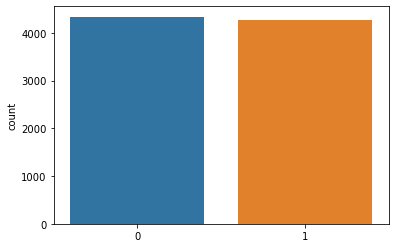

In [14]:

sns.countplot(target)

In [15]:
len(target)

8616

In [16]:
len(img)

8616

(array([75654804., 31592080., 25530512., 21069236., 19371772., 17429960.,
        15424000., 13071792.,  9054520., 10016492.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

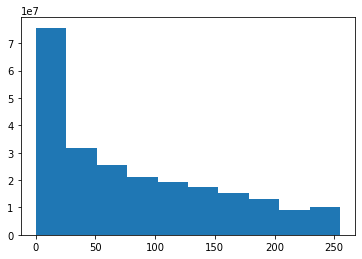

In [17]:
plt.hist(img.ravel())

In [18]:
X_train, X_test, y_train, y_test = train_test_split(img, target, test_size=0.15, random_state=42)

In [19]:
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(96,96,3))
output = restnet.layers[-1].input
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, outputs=output)
for layer in restnet.layers:
    layer.trainable = False


In [20]:
model = Sequential()
model.add(restnet)
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=10, batch_size=150,verbose=1)

Epoch 1/10
49/49 [==============================] - 43s 857ms/step - loss: 0.1222 - accuracy: 0.8785 - val_loss: 0.0239 - val_accuracy: 0.9776
Epoch 2/10
49/49 [==============================] - 44s 906ms/step - loss: 0.0257 - accuracy: 0.9735 - val_loss: 0.0231 - val_accuracy: 0.9768
Epoch 3/10
49/49 [==============================] - 45s 927ms/step - loss: 0.0216 - accuracy: 0.9784 - val_loss: 0.0163 - val_accuracy: 0.9838
Epoch 4/10
49/49 [==============================] - 45s 927ms/step - loss: 0.0207 - accuracy: 0.9794 - val_loss: 0.0182 - val_accuracy: 0.9830
Epoch 5/10
49/49 [==============================] - 45s 923ms/step - loss: 0.0186 - accuracy: 0.9816 - val_loss: 0.0187 - val_accuracy: 0.9822
Epoch 6/10
49/49 [==============================] - 46s 931ms/step - loss: 0.0191 - accuracy: 0.9817 - val_loss: 0.0187 - val_accuracy: 0.9814
Epoch 7/10
49/49 [==============================] - 45s 919ms/step - loss: 0.0157 - accuracy: 0.9845 - val_loss: 0.0167 - val_accuracy: 0.9838

In [21]:
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)
pred_train

array([[4.4319258e-08],
       [1.0000000e+00],
       [7.1563126e-30],
       ...,
       [5.3693510e-36],
       [1.0000000e+00],
       [3.0241799e-15]], dtype=float32)

In [22]:
def convert(p_t):
    temp=[]
    for i in range(len(p_t)):
        temp.append(p_t[i][0])
    p_t=temp
    for i in range(len(p_t)):
        if p_t[i]<0.5:
            p_t[i]=0
        else:
            p_t[i]=1
    return p_t
pred_train=convert(pred_train)
pred_test=convert(pred_test)

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test, pred_test)*100)
print(accuracy_score(y_train,pred_train)*100)
#sns.countplot(y_test,hue=pred_test)

97.7571539056458
98.4159497473713


In [24]:
def liff(folder,m,n):
    images = []
    for i in range(len(folder)):
        img = cv2.imread(folder[i])
        img= cv2.resize(img,(m,n), interpolation = cv2.INTER_AREA)
        img=np.array(255*(img / 255) ** 2, dtype = 'uint8')
        images.append(img)
    images=np.array(images)
    
    return images

In [25]:
f=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/house/*.jpeg')
f.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/house/*.jpg'))
f.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/house/*.png'))

In [26]:
positive_img=liff(f,96,96)

In [27]:
pm=model.predict(positive_img)

In [28]:
pm=convert(pm)

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

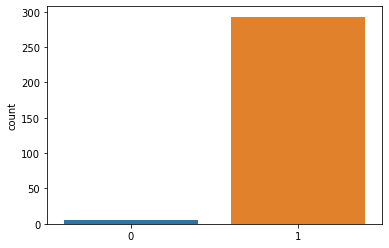

In [29]:
sns.countplot(pm)

In [30]:
f1=glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/not_house/*.jpeg')
f1.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/not_house/*.jpg'))
f1.extend(glob.glob('/home/srikanth/Downloads/drive-download-20210121T065134Z-001/CV/Dataset/House_dataset/Testing/not_house/*.png'))

In [31]:
negative_img=liff(f1,96,96)

In [32]:
pm1=model.predict(negative_img)

In [33]:
pm1=convert(pm1)

In [34]:
def prin_conf(model_name,conf_matrix):
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    conf_sensitivity = (TP / float(TP + FN))
    conf_specificity = (TN / float(TN + FP))
    print('the sensitivity of the'+model_name+' with dimensions is',conf_sensitivity*100)
    print('the specificity of the',model_name,' with dimensions is',conf_specificity*100)

In [35]:
pm2=np.concatenate([pm,pm1])

In [36]:
pos=[1]*len(pm)

In [37]:
neg=[0]*len(pm1)

In [38]:
tar=np.concatenate([pos,neg])

In [39]:
prin_conf(' 96*96',confusion_matrix(pm2,tar))

the sensitivity of the 96*96 with dimensions is 93.01587301587301
the specificity of the  96*96  with dimensions is 97.72727272727273


In [40]:
accuracy_score(pm2,tar)*100

95.16407599309153

In [41]:
model_json = model.to_json()
with open('model_96*96.json', "w") as json_file:
    json_file.write(model_json)
model.save_weights('model_96*96.h5')

In [42]:
from keras.models import load_model
from keras.models import model_from_json

In [43]:

json_file = open('model_96*96.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights('model_96*96.h5')
